<a href="https://colab.research.google.com/github/kaispace30098/nlp_transfer_learning_classification/blob/main/Transfer_Learning_Model_on_Kaggle_Toxic_Comment_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install pandasql
!pip install xlrd==2.0.1
import pandas as pd
import io
from google.colab import files
import numpy as np


def read_dir_file(case_f):  # case_f = 0 for uploading one File and case_f = 1 for uploading one Zipped Directory
        #uploaded = files.upload()    # to upload a Full Directory, please Zip it first (use WinZip)
        for fn in uploaded.keys():
            name = fn  #.encode('utf-8')
            #print('\nfile after encode', name)
            #name = io.BytesIO(uploaded[name])
        if case_f == 0:    # case of uploading 'One File only'
            print('\n file name: ', name)
            return name
        else:   # case of uploading a directory and its subdirectories and files
            zfile = zipfile.ZipFile(name, 'r')   # unzip the directory 
            zfile.extractall()
            for d in zfile.namelist():   # d = directory
                print('\n main directory name: ', d)
                return d
 
#upload csv
uploaded = files.upload()
fileName = read_dir_file(0)
df1=pd.read_csv(io.BytesIO(uploaded[fileName]))

Saving toxic_train.csv to toxic_train (1).csv

 file name:  toxic_train.csv


In [12]:
df1['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

(<seaborn.axisgrid.FacetGrid at 0x7f94ef748090>,
 <seaborn.axisgrid.FacetGrid at 0x7f94ea4a6410>)

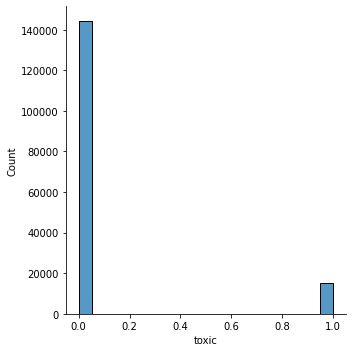

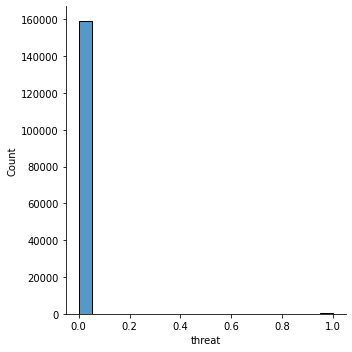

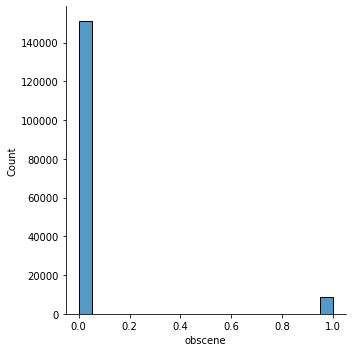

In [13]:
import seaborn as sn
sn.displot(df1['toxic']), sn.displot(df1['threat']),sn.displot(df1['obscene'])

In [14]:
sample_sentence='hello world!'
#The input is variable length English text and the output is a 512 dimensional vector
#Word Sequences rather than just individual words embedding
import tensorflow_hub as hub
embed=hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')
embed_samples=embed([sample_sentence,'good night baby'])
print(embed_samples[0][:50])

tf.Tensor(
[-0.02607422 -0.08460002 -0.02678661  0.05678423  0.06197045  0.03822602
  0.02011494  0.02740877  0.08698321  0.03079179  0.04104117  0.02551835
  0.00096512  0.05892798  0.04009536  0.04670895 -0.03312796  0.04070418
 -0.01199297 -0.04761707 -0.00829665  0.07054674  0.00484351  0.08098248
 -0.05701774 -0.06435516  0.06971473 -0.06988385  0.02646064 -0.02352202
  0.05523751  0.04913642  0.05698972 -0.06107194  0.03608509  0.02324465
  0.05601753 -0.01095515  0.04213083 -0.01769539  0.00712432  0.02047029
 -0.07101265 -0.08455775  0.04360583  0.04793973 -0.0901802  -0.06873439
  0.01279598  0.01624986], shape=(50,), dtype=float32)


In [15]:
#prepare text samples and their labels
#convert the sentences (strings) into integers
#pad sequences so that we get NxT matrix
#prepare embedding matrix
#load pre-trained word embeddings into an Embedding layer
#embedding layers trainable = False keep the embeddings fixed

In [16]:
df1.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [17]:
import tensorflow as tf
from tensorflow.keras import layers
#Create a Keras layer using the USE pretrained layer from tensorflow hub
sentence_encoder_layer=hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                                      input_shape=[],
                                      dtype=tf.string,
                                      trainable=False,
                                      name='USE')

In [19]:
#Create Model
model=tf.keras.Sequential([
                           sentence_encoder_layer,
                           layers.Dense(64,activation='relu'),
                           layers.Dense(6,activation='sigmoid')
],name='model_USE')

In [20]:
#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy']
            )

In [21]:
model.summary()

Model: "model_USE"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_1 (Dense)             (None, 64)                32832     
                                                                 
 dense_2 (Dense)             (None, 6)                 390       
                                                                 
Total params: 256,831,046
Trainable params: 33,222
Non-trainable params: 256,797,824
_________________________________________________________________


In [22]:
possible_labels = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
targets = df1[possible_labels].values

In [30]:
# some configuration
VALIDATION_SPLIT = 0.2
BATCH_SIZE = 128
EPOCHS = 3

In [31]:
print('Training model...')
r = model.fit(
  df1.comment_text,
  targets,
  batch_size=BATCH_SIZE,
  epochs=EPOCHS,
  validation_split=VALIDATION_SPLIT
)

Training model...
Epoch 1/3
998/998 [==============================] - 171s 171ms/step - loss: 0.0571 - accuracy: 0.9569 - val_loss: 0.0575 - val_accuracy: 0.9472
Epoch 2/3
998/998 [==============================] - 193s 194ms/step - loss: 0.0561 - accuracy: 0.9508 - val_loss: 0.0570 - val_accuracy: 0.9668
Epoch 3/3
998/998 [==============================] - 160s 160ms/step - loss: 0.0553 - accuracy: 0.9532 - val_loss: 0.0563 - val_accuracy: 0.9347


In [32]:
##Saving model in HDF5

model.save('model_USE.h5')

In [ ]:
import tensorflow_hub as hub

In [ ]:
##Load model with custom Hub layer
load_model=tf.keras.models.load_model('model_6.h5',custom_objects={"KerasLayer":hub.KerasLayer})

In [33]:
#How does our loaded model perform?
#upload csv
uploaded = files.upload()
fileName = read_dir_file(0)
df2=pd.read_csv(io.BytesIO(uploaded[fileName]))

Saving toxic_test.csv to toxic_test.csv

 file name:  toxic_test.csv


In [35]:
model.predict(['i hate you very much go fuck yourself'])

array([[0.99375737, 0.49707478, 0.9738076 , 0.07471305, 0.87696296,
        0.05250204]], dtype=float32)

In [36]:
print(possible_labels)

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


In [38]:
prediction=model.predict(df2.comment_text)

In [39]:
prediction.shape

(153164, 6)

In [40]:
df_result = pd.DataFrame(prediction, columns = possible_labels)

In [43]:
df_result.head()
df_result['id']=df2.id

In [44]:
df_result.to_csv('prediction.csv',index=False) 
files.download('prediction.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>